In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import datetime
import sklearn as sk
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from pandas.plotting import scatter_matrix


In [2]:
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('matplotlib version:', mpl.__version__)

%matplotlib inline

numpy version: 1.20.1
pandas version: 1.2.4
scikit-learn version: 0.24.1
matplotlib version: 3.3.4


## Reading Dataset

In [3]:
#Importing dataset
df_orders = pd.read_csv("olist_orders_dataset.csv")
df_customers = pd.read_csv("olist_customers_dataset.csv")
df_geoloc = pd.read_csv("olist_geolocation_dataset.csv")
df_items = pd.read_csv("olist_order_items_dataset.csv")
df_payments = pd.read_csv("olist_order_payments_dataset.csv")
df_seller = pd.read_csv("olist_sellers_dataset.csv")
df_product = pd.read_csv("olist_products_dataset.csv")
df_product_translation = pd.read_csv("product_category_name_translation.csv")
df_orders.head(10)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [4]:
print('Order dataset shape : {}'.format(df_orders.shape))


Order dataset shape : (99441, 8)


In [5]:

df_product.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:

df_product_translation.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## Data Cleaning

In [7]:
print("Total null pada order status column : ", df_orders['order_status'].isnull().sum())
print("Total null pada column order_delivered_customer_date : ", df_orders['order_delivered_customer_date'].isnull().sum())
print("Total null pada column order_delivered_carrier_date : ", df_orders['order_delivered_carrier_date'].isnull().sum())
print("Total null pada column order_approved_at : ", df_orders['order_approved_at'].isnull().sum())


Total null pada order status column :  0
Total null pada column order_delivered_customer_date :  2965
Total null pada column order_delivered_carrier_date :  1783
Total null pada column order_approved_at :  160


In [8]:
print(df_orders.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [9]:
print(df_items.isnull().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [11]:
#Example
#df1 = df[['a','b']]
#Select all cases where the first name is not missing and nationality is USA 
#df[df['first_name'].notnull() & (df['nationality'] == "USA")]
print(df_orders['order_status'][df_orders['order_delivered_customer_date'].isnull()].value_counts())
#print(df_orders[['order_status','order_delivered_customer_date']])
#print(df_orders[df_orders['order_status'].notnull() & (df_orders['order_delivered_customer_date'].notnull())])
#print(df_orders[df_orders['order_status'] & (df_orders['order_delivered_customer_date'].isnull())])


shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_status, dtype: int64


In [12]:

print(df_orders['order_status'][df_orders['order_delivered_carrier_date'].isnull()].value_counts())

unavailable    609
canceled       550
invoiced       314
processing     301
created          5
delivered        2
approved         2
Name: order_status, dtype: int64


In [13]:
print(df_orders['order_status'][df_orders['order_approved_at'].isnull()].value_counts())

canceled     141
delivered     14
created        5
Name: order_status, dtype: int64


In [14]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


     

missing_values_table(df_orders)


Your selected dataframe has 8 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
order_delivered_customer_date,2965,3.0
order_delivered_carrier_date,1783,1.8
order_approved_at,160,0.2


In [15]:
missing_values_table(df_items)


Your selected dataframe has 7 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [16]:

df_orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,fc512d4792550a29d6b7941c38ab612e,d94dd892998e1f07d4a84e9475d6c05e,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-07-24 21:36:42,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


## Data Analysis

In [17]:
#Getting know the oldest duration of Order made and latest date order made
print("Oldest order made : ", df_orders['order_purchase_timestamp'].min())
print("Latest order made : ", df_orders['order_purchase_timestamp'].max())


Oldest order made :  2016-09-04 21:15:19
Latest order made :  2018-10-17 17:30:18


Pada dataset ini, order dibuat antara 4-9-2016 sampai dengan 17-10-2018

In [18]:
#Getting know total orders made 
print("Number of orders made in those period : ",df_orders['order_id'].count())


Number of orders made in those period :  99441


In [19]:
#Getting know how much customers involved in those sales
print("Number of customers : ", df_orders['customer_id'].nunique(), " From total customers : ", df_orders['customer_id'].count())

Number of customers :  99441  From total customers :  99441


In [20]:
print("Total customers of OLIST : ", df_customers['customer_id'].nunique())


Total customers of OLIST :  99441


In [21]:
#Getting know where the most people come from
print("Order made from : ")
cities_distinct = df_customers['customer_city'].nunique()
c1 = df_customers.groupby('customer_city')['customer_id'].nunique().sort_values(ascending = False)
print(c1.head(10))


Order made from : 
customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_id, dtype: int64


In [22]:
#We want to know the dsitribution of order status
status1 = df_orders.groupby('order_status')['order_id'].nunique().sort_values(ascending = False)
print(status1.head(10))


order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64


In [23]:
#Getting know how much revenue Olist can generate :
print("Total Revenue : ")
revenue1 = df_items['price'].sum()
print(revenue1, " real")


Total Revenue : 
13591643.700000003  real


In [24]:
#Change data frame type to datetime of everything related to Date and Time
df_orders_copy = df_orders.copy()
df_orders_copy["order_purchase_timestamp"] = pd.to_datetime(df_orders["order_purchase_timestamp"], format='%Y-%m-%d %H:%M:%S')
df_orders_copy["order_approved_at"] = pd.to_datetime(df_orders["order_approved_at"], format='%Y-%m-%d %H:%M:%S')
df_orders_copy["order_delivered_carrier_date"] = pd.to_datetime(df_orders["order_delivered_carrier_date"], format='%Y-%m-%d %H:%M:%S')
df_orders_copy["order_delivered_customer_date"] = pd.to_datetime(df_orders["order_delivered_customer_date"], format='%Y-%m-%d %H:%M:%S')
df_orders_copy["order_estimated_delivery_date"] = pd.to_datetime(df_orders["order_estimated_delivery_date"], format='%Y-%m-%d %H:%M:%S')
df_orders_copy.dtypes


order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [25]:
time18 = datetime.datetime(2020, 5, 17, 18, 0, 0)
#df_time_above18dt = pd.to_datetime(df_time_above18, format = '%H:%M:%S')
time_above_18 = df_orders_copy[(df_orders_copy['order_purchase_timestamp'].dt.time) >= time18.time()].count()
#timeyear = df_orders_copy['order_purchase_timestamp'].dt.time
print("")
ta18_order_id = time_above_18['order_id']
numboford = df_orders_copy['order_id'].nunique()
time_above_18_percent = (ta18_order_id/numboford)*100
print("Total order made above 18 o'clock : ",ta18_order_id)
print("And cover around : ", time_above_18_percent , " %")



Total order made above 18 o'clock :  34100
And cover around :  34.29169055017548  %


Sebanyak 34100 order dilakukan dari sore hingga malam

In [26]:
time_below_18 = df_orders_copy[(df_orders_copy['order_purchase_timestamp'].dt.time) < time18.time()].count()
tb18_order_id = time_below_18['order_id']
time_below_18_percent = (tb18_order_id/numboford)*100
print("Total order made below 18 o'clock : ",tb18_order_id)
print("And cover around : ", time_below_18_percent, " %")


Total order made below 18 o'clock :  65341
And cover around :  65.70830944982453  %


Di sisi lain, 65431 order dilakukan dari pagi hingga sore

## Analisa Item Dataset

In [45]:
#Extracting table first
df_orders_copy['day_name']=df_orders_copy['order_purchase_timestamp'].dt.day_name
df_orders_copy['year']=df_orders_copy['order_purchase_timestamp'].dt.year
df_orders_copy['day']=df_orders_copy['order_purchase_timestamp'].dt.day
df_orders_copy['month']=df_orders_copy['order_purchase_timestamp'].dt.month
df_orders_copy['hour']=df_orders_copy['order_purchase_timestamp'].dt.hour
df_orders_copy.head(5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,day_name,year,day,month,hour
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,<bound method PandasDelegate._add_delegate_acc...,2017,2,10,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,<bound method PandasDelegate._add_delegate_acc...,2018,24,7,20
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,<bound method PandasDelegate._add_delegate_acc...,2018,8,8,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,<bound method PandasDelegate._add_delegate_acc...,2017,18,11,19
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,<bound method PandasDelegate._add_delegate_acc...,2018,13,2,21


In [46]:
df_items_copy = df_items.copy()
df_items_copy['total_order_value'] = ((df_items_copy['order_item_id']*df_items_copy['price']) + df_items_copy['order_item_id']*df_items_copy['freight_value'])
df_items_copy.head(5)



,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_order_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04


In [47]:
#We can use either this below or below next
#df_orders_copy.set_index('order_id').join(df_items_copy.set_index('order_id'))
df_join_item_order = df_orders_copy.join(df_items_copy.set_index('order_id'), on='order_id')
df_join_item_order.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,day_name,year,day,month,hour,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_order_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,<bound method PandasDelegate._add_delegate_acc...,2017,2,10,10,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,<bound method PandasDelegate._add_delegate_acc...,2018,24,7,20,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,<bound method PandasDelegate._add_delegate_acc...,2018,8,8,8,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,<bound method PandasDelegate._add_delegate_acc...,2017,18,11,19,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,<bound method PandasDelegate._add_delegate_acc...,2018,13,2,21,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,28.62


In [48]:
df_join_item_order.dtypes


order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
day_name                                 object
year                                      int64
day                                       int64
month                                     int64
hour                                      int64
order_item_id                           float64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
total_order_value                       float64
dtype: object

Text(0, 0.5, 'Revenue in BRL (Brasilian Real)')

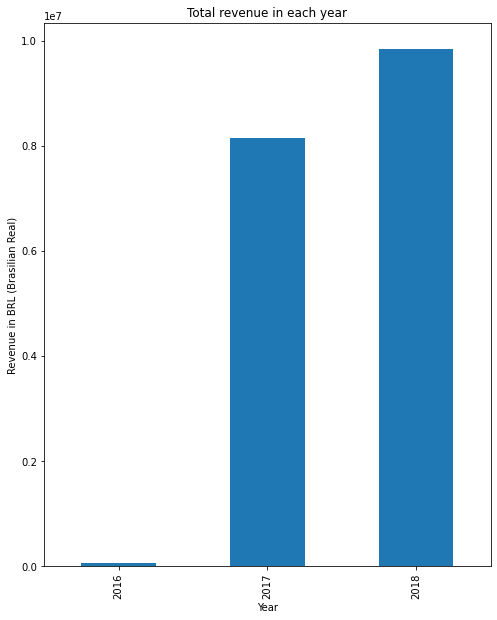

In [49]:
valuegraph1 = df_join_item_order.groupby('year')['total_order_value'].sum()
valuegraph1fix = valuegraph1.plot(kind="bar", figsize = (8,10))
valuegraph1fix.set_title('Total revenue in each year')
valuegraph1fix.set_xlabel('Year')
valuegraph1fix.set_ylabel('Revenue in BRL (Brasilian Real)')


## Analisa Order Dataset

In [50]:
print(df_orders.dtypes)


order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object


In [51]:
print("Order database contains", df_orders.shape[0], "rows and", df_orders.shape[1], "columns")

Order database contains 99441 rows and 8 columns


In [52]:
#Unique number of Order id, since products could be bought from same order
orders_un = df_orders["order_id"].nunique()
print("Number of unique orders : ", orders_un)

#Distinct customer made orders
customers_un = df_orders["customer_id"].nunique()
print("Number of distinct customer made orders : ", customers_un)


Number of unique orders :  99441
Number of distinct customer made orders :  99441


In [53]:
df_orders.describe()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,fc512d4792550a29d6b7941c38ab612e,d94dd892998e1f07d4a84e9475d6c05e,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-07-24 21:36:42,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


<AxesSubplot:xlabel='order_purchase_timestamp'>

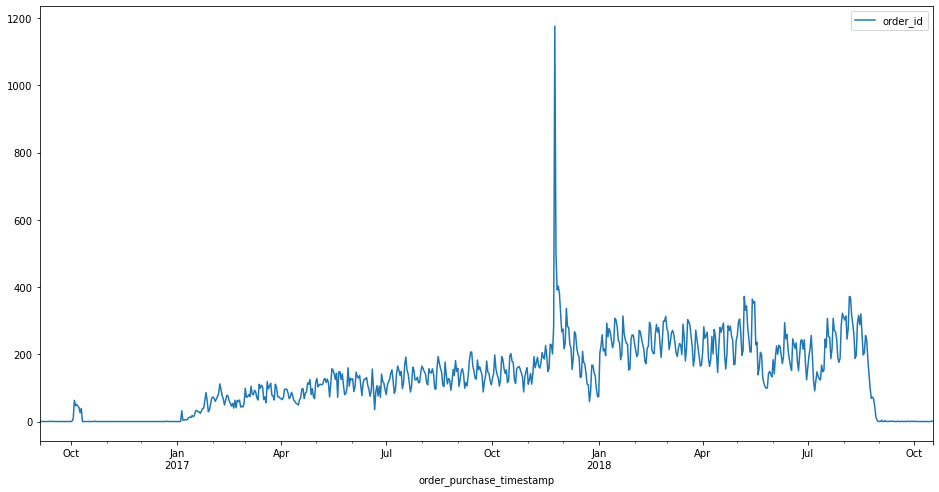

In [54]:
#date_span = df_orders_copy.set_index("order_purchase_timestamp").(groupbyd.Grouper(freq='D')).count()
date_span = df_orders_copy.set_index("order_purchase_timestamp").groupby(pd.Grouper(freq='D')).count()
fig1 = plt.figure(figsize=(16,8))
ax = fig1.gca()
date_span.plot(y="order_id", use_index=True, ax=ax)


## Analysis of Product Dataset

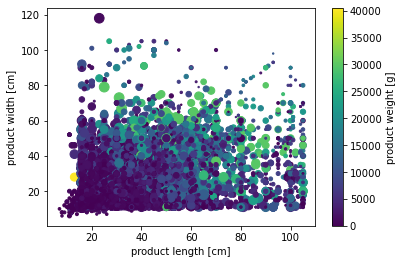

In [55]:
%matplotlib inline 

fig = plt.figure()
plt.scatter(df_product['product_length_cm'], df_product['product_width_cm'], c=df_product['product_weight_g'], s=df_product['product_height_cm']**1)
plt.xlabel('product length [cm]')
plt.ylabel('product width [cm]')
plt.colorbar(label='product weight [g]');
